# Project 2: Regression Project
Data Set: [Mercedes-Benz Greener Manufacturing](https://www.kaggle.com/c/mercedes-benz-greener-manufacturing) <br>
*\"Can you cut the time a Mercedes-Benz spends on the test bench?\"*

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(style="whitegrid")
title_font = {"family":"sans-serif", 
              "color":"gray", 
              "size":16, 
              "weight":"bold"}
axis_font = {"family":"sans", 
              "color":"gray", 
              "size":14, 
              "weight":"normal"}

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
train = pd.read_csv("/content/drive/My Drive/MertColab/proje2/train.csv")
test = pd.read_csv("/content/drive/My Drive/MertColab/proje2/test.csv")
display(train.head())
test.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,...,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
train.info(verbose=False)
print("Shape of the data set: {0}x{1}".format(train.shape[0], train.shape[1]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB
Shape of the data set: 4209x378


In [ ]:
print("-----Unique values of some of the rows-----")
for i in train.columns[:13]:
    print(f"Row   : '{i}' ({train[i].dtype})\nValues: {train[i].unique()}")
    print(f"Count : {train[i].nunique()}\n")

-----Unique values of some of the rows-----
Row   : 'ID' (int64)
Values: [   0    6    7 ... 8412 8415 8417]
Count : 4209

Row   : 'y' (float64)
Values: [130.81  88.53  76.26 ...  85.71 108.77  87.48]
Count : 2545

Row   : 'X0' (object)
Values: ['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab']
Count : 47

Row   : 'X1' (object)
Values: ['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab']
Count : 27

Row   : 'X2' (object)
Values: ['at' 'av' 'n' 'e' 'as' 'aq' 'r' 'ai' 'ak' 'm' 'a' 'k' 'ae' 's' 'f' 'd'
 'ag' 'ay' 'ac' 'ap' 'g' 'i' 'aw' 'y' 'b' 'ao' 'al' 'h' 'x' 'au' 't' 'an'
 'z' 'ah' 'p' 'am' 'j' 'q' 'af' 'l' 'aa' 'c' 'o' 'ar']
Count : 44

Row   : 'X3' (object)
Values: ['a' 'e' 'c' 'f' 'd' 'b' 'g']
Count : 7

Row   : 'X4' (object)
Values: ['d' 'b' 'c' 'a']
Count : 4

R

In [ ]:
print("-----Sorted values of the rows X0 to X8-----")
for i in train.columns[2:10]:
    print(f"Row   : '{i}' ({train[i].dtype})")
    print(f"Values: {sorted(train[i].unique())}")
    print(f"Count : {train[i].nunique()}\n")

-----Sorted values of the rows X0 to X8-----
Row   : 'X0' (object)
Values: ['a', 'aa', 'ab', 'ac', 'ad', 'af', 'ai', 'aj', 'ak', 'al', 'am', 'ao', 'ap', 'aq', 'as', 'at', 'au', 'aw', 'ax', 'ay', 'az', 'b', 'ba', 'bc', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
Count : 47

Row   : 'X1' (object)
Values: ['a', 'aa', 'ab', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'y', 'z']
Count : 27

Row   : 'X2' (object)
Values: ['a', 'aa', 'ac', 'ae', 'af', 'ag', 'ah', 'ai', 'ak', 'al', 'am', 'an', 'ao', 'ap', 'aq', 'ar', 'as', 'at', 'au', 'av', 'aw', 'ay', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'x', 'y', 'z']
Count : 44

Row   : 'X3' (object)
Values: ['a', 'b', 'c', 'd', 'e', 'f', 'g']
Count : 7

Row   : 'X4' (object)
Values: ['a', 'b', 'c', 'd']
Count : 4

Row   : 'X5' (object)
Values: ['aa', 'ab', 'ac', 'ad

In [ ]:
# Let's convert the data of these columns to numeric values.
# e.g a=1, c=3, z=26, aa=27, ac=29, ba=54, bd=57 etc.
from string import ascii_lowercase

for data in (test, train):
    for col in data.columns[1:10]:
        temp = 1
        for var1 in ascii_lowercase:
            var2 = "a" + var1
            var3 = "b" + var1
            data[col] = data[col].replace(var1, temp)
            data[col] = data[col].replace(var2, temp+26)
            data[col] = data[col].replace(var3, temp+26*2)
            temp+=1
        data[col] = data[col].astype("int64")    # data types are also changed.

In [ ]:
# Standardization of these numeric values
from sklearn.preprocessing import scale

for col in train.columns[2:10]:
    train[col] = scale(train[col])
    test[col] = scale(test[col])

In [ ]:
train_corr = train.iloc[:, 1:].corr()
train_corr.describe().loc[:, :"X10"]

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,0.007202,0.011653,-0.002828,0.003129,-0.012056,0.002589,0.003111,-0.000556,0.003633,-0.003416
std,0.141801,0.129768,0.151312,0.162195,0.148531,0.053688,0.057074,0.072933,0.061798,0.080394
min,-0.510505,-0.434098,-0.723810,-0.632744,-0.588272,-0.061497,-0.065223,-0.162361,-0.111375,-0.181647
25%,-0.041378,-0.046404,-0.034600,-0.073397,-0.080666,0.000355,-0.015081,-0.023321,-0.018331,-0.024757
50%,0.011945,0.002598,0.008460,0.001841,-0.008149,0.001949,-0.000082,-0.003119,0.004027,-0.010003
75%,0.062720,0.051050,0.054399,0.064070,0.045813,0.004785,0.016467,0.018485,0.024513,-0.002532
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# To grasp what's going on above a little bit, let's check
# 10 maximum correlation values among the columns
for i in train_corr.columns:
    print("Column:", i, "\n", 
          sorted(round(abs(train_corr[i]), 3), reverse=True)[1:11])

Column: y 
 [nan, 0.379, 0.379, 0.368, 0.368, 0.25, 0.238, 0.23, 0.201, 0.195]
Column: X0 
 [nan, 0.393, 0.393, 0.393, 0.391, 0.391, 0.282, 0.262, 0.225, 0.221]
Column: X1 
 [0.724, 0.668, 0.571, 0.175, 0.161, 0.156, 0.144, 0.139, 0.135, 0.134]
Column: X2 
 [nan, 0.725, 0.713, 0.642, 0.621, 0.592, 0.454, 0.449, 0.32, 0.298]
Column: X3 
 [nan, 0.478, 0.395, 0.262, 0.218, 0.216, 0.191, 0.191, 0.189, 0.189]
Column: X4 
 [nan, 0.061, 0.039, 0.039, 0.038, 0.035, 0.033, 0.03, 0.029, 0.028]
Column: X5 
 [nan, 0.049, 0.049, 0.048, 0.046, 0.046, 0.045, 0.045, 0.044, 0.042]
Column: X6 
 [nan, 0.214, 0.177, 0.162, 0.123, 0.109, 0.104, 0.099, 0.098, 0.095]
Column: X8 
 [nan, 0.095, 0.094, 0.077, 0.077, 0.073, 0.071, 0.069, 0.065, 0.065]
Column: X10 
 [0.441, 0.4, 0.305, 0.212, 0.144, 0.141, nan, 0.133, 0.125, 0.119]
Column: X11 
 [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
Column: X12 
 [1.0, 0.265, 0.256, 0.247, 0.23, 0.215, 0.206, 0.202, 0.202, 0.202]
Column: X13 
 [1.0, 0.371, 0.339, 0.2

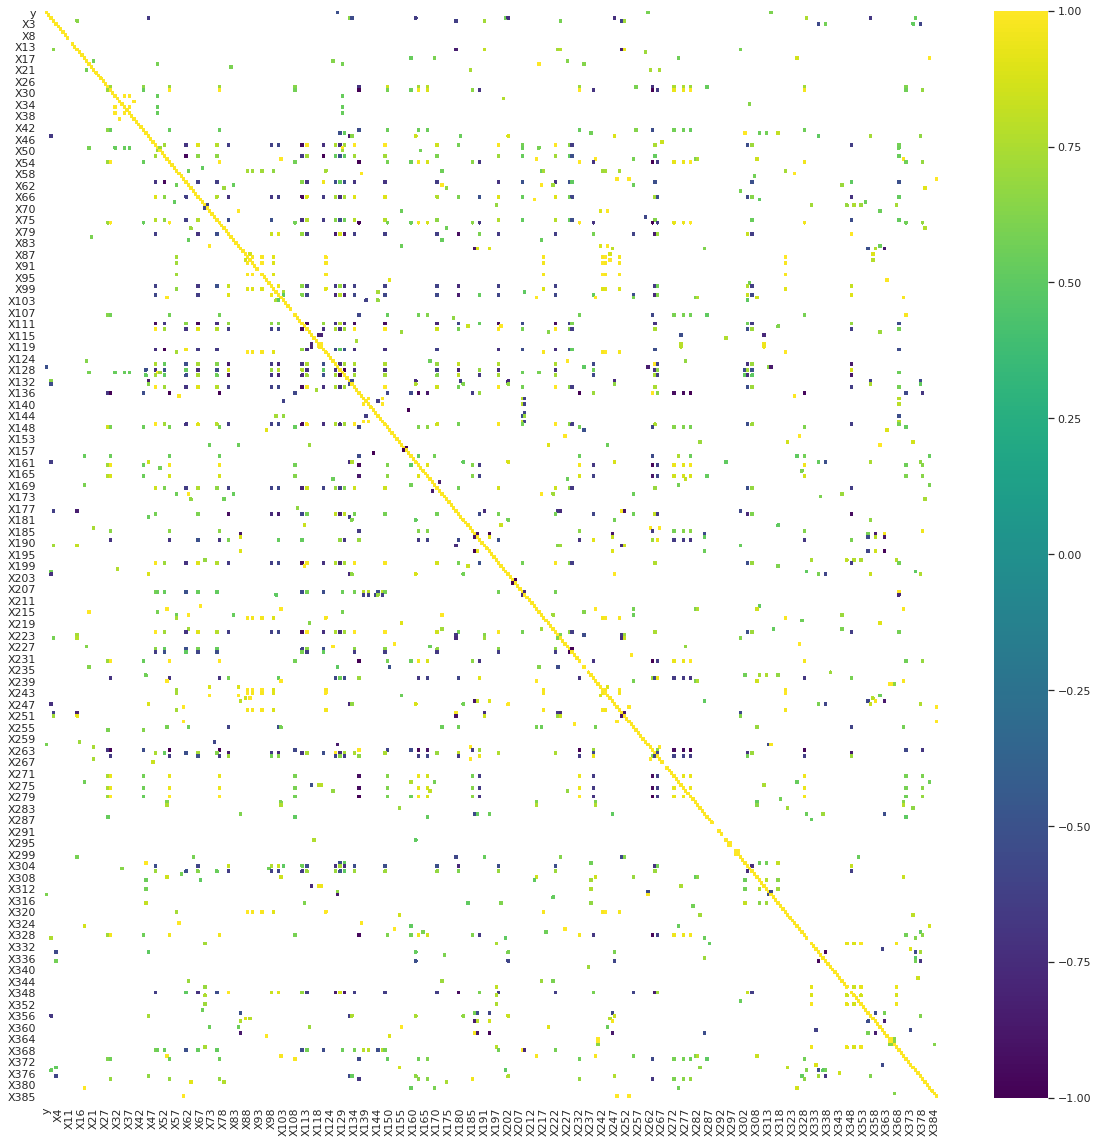

In [ ]:
plt.figure(figsize=(20,20))
ax = sns.heatmap(train_corr[abs(train_corr)>0.5], annot=False, linecolor="black", linewidths=0,
            vmin=-1, vmax=1, cmap="viridis")
plt.show()

## OLS

In [ ]:
# How about we give the Ordinary Least Squares a shot first?
import statsmodels.api as sm
X = train.iloc[:, 2:]
Y = train.y

X = sm.add_constant(X)
results_model = sm.OLS(Y,X)
results_ols = results_model.fit()
print("Adjusted R-square value: %.4f" %results_ols.rsquared_adj)

Adjusted R-square value: 0.5630


### Checking Linear Regression Assumptions

In [ ]:
 # Assumption-1: Linearity of the model in the coefficients

In [ ]:
# Assumption-2: Error term should be near zero in means
predict = results_ols.predict(X)
errors = train.y - predict
print("The average error between the predicted & real value:\n\
{:.16f}".format(np.mean(errors)))

The average error between the predicted & real value:
0.0000000000000881


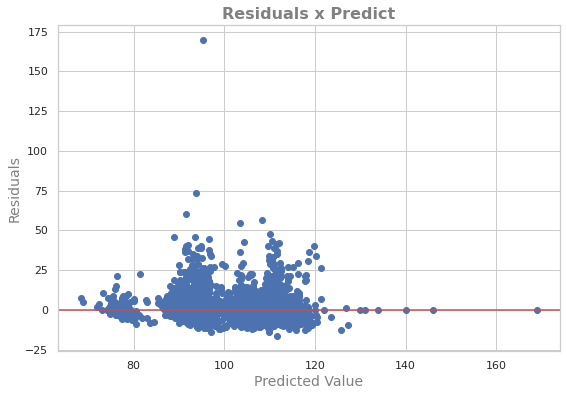

In [ ]:
# Assumption-3: Homoscedasticity
plt.figure(figsize=(9,6))
plt.scatter(predict, errors)
plt.xlabel('Predicted Value', fontdict = axis_font)
plt.ylabel('Residuals', fontdict = axis_font)
plt.axhline(y=0, color="r")
plt.title('Residuals x Predict', fontdict = title_font)
plt.show()

In [ ]:
# Bartlett and the Levene tests will confirm this assumption.
# The null hypothesis for both tests is that the errors are homoscedastic.
# If the p-values < 0.05, the hypothesis will be rejected (i.e heteroscedastic).
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predict, errors)
lev_stats = levene(predict, errors)

print("Bartlett test statistic value is {0:.2f} and p-value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:.2f} and p-value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 138.26 and p-value is 6.4e-32
Levene test statistic value is 543.68 and p-value is 1.4e-116


In [ ]:
# Assumption-4: Low multicollinearity
    # From the heatmap and related lines above,
    # we saw that there are high collinearity among the features

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


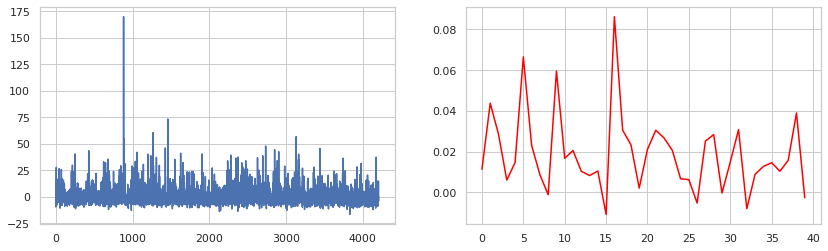

In [ ]:
# Assumption-5: Error terms should be uncorrelated with one another
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.plot(errors)

plt.subplot(1,2,2)
from statsmodels.tsa.stattools import acf
acf_data = acf(errors)
plt.plot(acf_data[1:], color="red")

plt.show()
# From the first figure, you will see that the errors are uncorrelated
# where the second one implies very low autocorrelation among the errors.

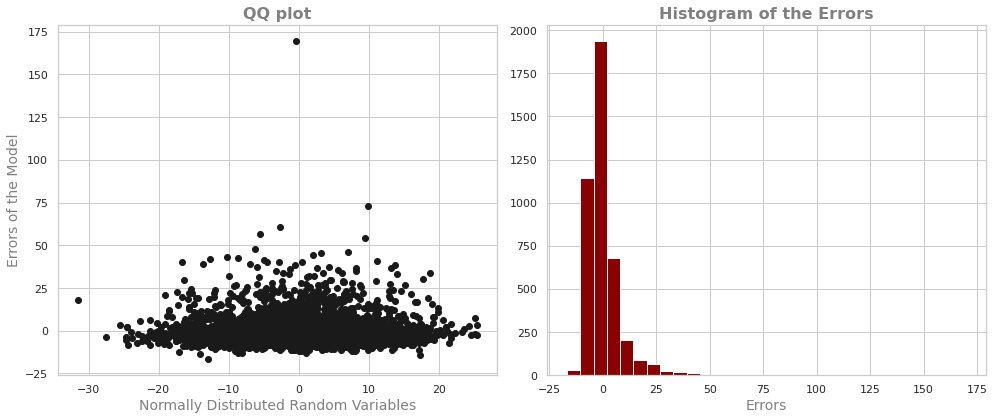

In [ ]:
# Assumption-6: Features shouldn't be correlated with the errors
rand_nums = np.random.normal(np.mean(errors), np.std(errors), len(errors))

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.scatter(rand_nums, errors, color="k")
plt.xlabel("Normally Distributed Random Variables", fontdict = axis_font)
plt.ylabel("Errors of the Model", fontdict = axis_font)
plt.title("QQ plot", fontdict = title_font)

plt.subplot(1,2,2)
plt.hist(errors, bins=30, color="darkred")
plt.xlabel("Errors", fontdict = axis_font)
plt.title("Histogram of the Errors", fontdict = title_font)

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest
jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0:.2f} and p value is {1:.5g}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0:.2f} and p value is {1:5g}".format(norm_stats[0], norm_stats[1]))
# We will see that the errors are not normally distributed as well.

Jarque-Bera test statistics is 498887.84 and p value is 0
Normality test statistics is 4037.46 and p value is     0


## OLS with PCA approach

In [ ]:
X = train.iloc[:, 2:]
Y = train.y

# Polynomial Features approach is cancelled due to lack of RAM.
#from sklearn.preprocessing import PolynomialFeatures
#poly = PolynomialFeatures(degree=2, interaction_only=True, order="C")
#X_poly = poly.fit_transform(X)

from sklearn.preprocessing import normalize, StandardScaler, scale
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_standard = scaler.fit_transform(X)
X_standard_T = X_standard.T
C_X = np.cov(X_standard_T)

eig_val_cov, eig_vec_cov = np.linalg.eig(C_X)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


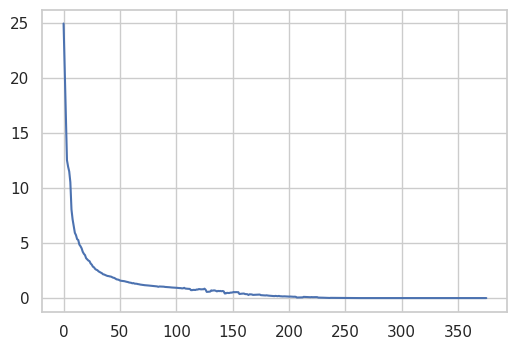

In [ ]:
plt.figure(dpi=100)
plt.plot(eig_val_cov)
plt.show()

In [ ]:
# Let's take the first 30 components.
pca = PCA(n_components = 200)
X_pca = pca.fit_transform(X_standard)

In [ ]:
total_variance = []

for i in pca.explained_variance_ratio_[:200]:
    total_variance.append(i)
print(f"Variance ratio of PCA-1: {sum(total_variance)*100:.2f}%")

Variance ratio of PCA-1: 99.19%


In [ ]:
# How about we give the Ordinary Least Squares a shot first?
import statsmodels.api as sm
X_pca = sm.add_constant(X_pca)
results_model = sm.OLS(Y,X_pca)
results_pca = results_model.fit()
print("Adjusted R-square value: %.4f" %results_pca.rsquared_adj)

Adjusted R-square value: 0.5617


With 200 principle components that have 99.2% variance ratio, the R-square value drops to about 0.563 from 0.562.

## Lasso

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
X = train.iloc[:, 2:]
lasso_CV = LassoCV(alphas=np.logspace(-1, 10, 10), cv=10).fit(X, Y)
lasso_score = lasso_CV.score(X, Y)
print("Adjusted R-square value: %.4f" %lasso_score)

Adjusted R-square value: 0.5441


## Ridge

In [ ]:
X = train.iloc[:, 2:]
ridge_CV = RidgeCV(alphas=np.logspace(-4, 100, 10), cv=10).fit(X, Y)
ridge_score = ridge_CV.score(X,Y)
print("Adjusted R-square value: %.4f" %ridge_score)

Adjusted R-square value: 0.5899


## Lasso with PolynomialFeatures

In [ ]:
## This step may be skipped later.
import warnings; warnings.filterwarnings("ignore")
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=True, order="F")
X_poly = poly.fit_transform(X)

lasso_CV_poly = LassoCV(alphas=np.logspace(-3, 10, 10)).fit(X_poly, Y)
lasso_score_poly = lasso_CV_poly.score(X_poly,Y)
print("Adjusted R-square value: %.4f" %lasso_score_poly)

Adjusted R-square value: 0.5441


## ElasticNet

In [ ]:
elasticNet_CV = ElasticNetCV(alphas=np.logspace(-6, 100, 20), l1_ratio=0.5, cv=10).fit(X, Y)
elasticNet_score = elasticNet_CV.score(X, Y)
print("Adjusted R-square value: %.4f" %elasticNet_score)

Adjusted R-square value: 0.5897


# Trying the kFold approach with Ridge Regression

In [ ]:
from sklearn.model_selection import KFold, cross_validate, cross_val_predict, train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse

kFold = KFold(10, shuffle=True, random_state=42)
mae1, mse1, rmse1, mape1, trainR_mean, testR_mean = ([] for i in range(6))

x1 = train.iloc[:, 2:]
y1 = train.y

ridge_sc = []

for train_kfold, test_kfold in kFold.split(x1, y1): 
    x1_train = x1.iloc[train_kfold]
    x1_test = x1.iloc[test_kfold]
    y1_train = y1.iloc[train_kfold]
    y1_test = y1.iloc[test_kfold]
    
    # R-square value of train set
    #x1_train = sm.add_constant(x1_train)
    results1_model = sm.OLS(y1_train, x1_train)
    results1_train = results1_model.fit()
    trainR_mean.append(results1_train.rsquared_adj)

    # R-square value of test set
    #x1_test = sm.add_constant(x1_test)
    results1_model = sm.OLS(y1_test, x1_test)
    results1_test = results1_model.fit()
    testR_mean.append(results1_test.rsquared_adj)

    y1_predict = results1_train.predict(x1_test)

    mae0 = mean_absolute_error(y1_test, y1_predict)
    mse0 = mse(y1_test, y1_predict)
    rmse0 = rmse(y1_test, y1_predict)
    mape0 = (abs((y1_test - y1_predict)) / y1_test).mean() * 100
    
    mae1.append(mae0)
    mse1.append(mse0)
    rmse1.append(rmse0)
    mape1.append(mape0)

    ridge_CV = RidgeCV(alphas=np.logspace(-3, 100, 10)).fit(x1_train, y1_train)
    ridge_sc.append(ridge_CV.score(x1_train,y1_train))
    elasticNet_CV = ElasticNetCV(alphas=np.logspace(-6, 1000, 10), l1_ratio=0.5).fit(X, Y)
    elasticNet_sc = elasticNet_CV.score(X, Y)

print(f"Adjusted mean R-square value of RidgeCV: {np.mean(ridge_sc):.3f}")
print(f"Adjusted mean R-square value of ElasticNetCV: {np.mean(elasticNet_sc):.3f}\n")

print(f"Adjusted mean R-square value of the train part, OLS : {np.array(trainR_mean).mean():.3f}")
print(f"Adjusted mean R-square value of the test part , OLS : {np.array(testR_mean).mean():.3f}")
print("\n---------Error Statistics of Test Part---------")
print(f"Mean Absolute Error (MAE)             : {np.array(mae1).mean():.2f}")
print(f"Mean Square Error (MSE)               : {np.array(mse1).mean():.2f}")
print(f"Root Mean Square Error (RMSE)         : {np.array(rmse1).mean():.2f}")
print(f"Mean Absolute Percentage Error (MAPE) : %{np.array(mape1).mean():.2f}")

Adjusted mean R-square value of RidgeCV: 0.592
Adjusted mean R-square value of ElasticNetCV: 0.590

Adjusted mean R-square value of the train part, OLS : 0.563
Adjusted mean R-square value of the test part , OLS : 0.570

---------Error Statistics of Test Part---------
Mean Absolute Error (MAE)             : 5.68
Mean Square Error (MSE)               : 76.41
Root Mean Square Error (RMSE)         : 8.65
Mean Absolute Percentage Error (MAPE) : %5.45


## TEST DATA

In [ ]:
# ridge regression
test_predict = ridge_CV.predict(test.iloc[:, 1:])
predicted_output_ridge = pd.concat([pd.Series(test.ID), pd.Series(test_predict)], axis=1)
predicted_output_ridge.columns = ["ID", "y"]
predicted_output_ridge.to_csv(path_or_buf="/content/drive/My Drive/MertColab/proje2/ridge_output.csv", index=False)

In [ ]:
# elasticNet regression
test_predict = elasticNet_CV.predict(test.iloc[:, 1:])
predicted_output_elasticNet = pd.concat([pd.Series(test.ID), pd.Series(test_predict)], axis=1)
predicted_output_elasticNet.columns = ["ID", "y"]
predicted_output_elasticNet.to_csv(path_or_buf="/content/drive/My Drive/MertColab/proje2/elasticNet_output.csv", index=False)

In [ ]:
# lasso regression
test_predict = lasso_CV.predict(test.iloc[:, 1:])
predicted_output_lasso = pd.concat([pd.Series(test.ID), pd.Series(test_predict)], axis=1)
predicted_output_lasso.columns = ["ID", "y"]
predicted_output_lasso.to_csv(path_or_buf="/content/drive/My Drive/MertColab/proje2/lasso_output.csv", index=False)

In [ ]:
# ols regression
X = train.iloc[:, 2:]
Y = train.y
X = sm.add_constant(X)
results_model = sm.OLS(Y,X)
results_ols = results_model.fit()

X_test = test.iloc[:, 1:]
X_test = sm.add_constant(X_test)
test_predict = results_ols.predict(X_test)
predicted_output_ols = pd.concat([pd.Series(test.ID), pd.Series(test_predict)], axis=1)
predicted_output_ols.columns = ["ID", "y"]
predicted_output_ols.to_csv(path_or_buf="/content/drive/My Drive/MertColab/proje2/ols_output.csv", index=False)

In [ ]:
# lasso reg. with polynomial features
X_poly = poly.fit_transform(test.iloc[:, 1:])

test_predict = lasso_CV_poly.predict(X_poly)
predicted_output_lassoPoly = pd.concat([pd.Series(test.ID), pd.Series(test_predict)], axis=1)
predicted_output_lassoPoly.columns = ["ID", "y"]
predicted_output_lassoPoly.to_csv(path_or_buf="/content/drive/My Drive/MertColab/proje2/lassoPoly_output.csv", index=False)

In [ ]:
predicted_output_lassoPoly.head()

,ID,y
0,1,77.605417
1,2,96.439772
2,3,76.076598
3,4,78.056363
4,5,112.455275


![MercedesCompetition_results](https://i.pinimg.com/originals/84/72/96/84729647efdfd1614a6707e9827dd97f.jpg)

Notlar:

*   Sadece ilk harfli kısım üzerine PCA yapılabilir veya o grubu kendi içinde polynomial features uygulanıp gözlemlenebilir.
*   $Chi^2$ testi (veya [ttest_ind](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)) ile değişkenlerin ilişkileri ele alınıp gruplanabilir.
    * Konu 4.6